# Treasury yield curve rate analysis

In this notebook, we would do some simple analysis on US Treasury yield curve rate during the period from 1/1/1996 to 11/20/2016.

Firstly we need to download the dataset into pandas dataframe. The code is shown as follows:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#prepare the treasury yield rate data from 1/2/1996 to 11/21/2016 and drop the 1 month yeild rate 
df_origin=pd.read_csv('C:\\Users\\zhang\\Desktop\\Treasury_Yield_Curve.csv')

Now we get the original data. The next step is to shrink the dataframe to the period 1/1/1996-11/20/2016 and cut off the '1 month' treasury yield rate.

In [11]:
df_origin.index=df_origin['Date']
df_cut=df_origin.drop(['Date','1 mo'],axis=1)
df_cut=df_cut.loc['1/2/1996':'11/21/2016',:]
#print(df_cut)

After that, we want to construct a series of daily difference of treasury yield curve rate. To speed up the debugging, we use shift function to shift the dataframe with 1 row, which works much better than indexing.

In [10]:
#calculate daily difference
df_differ=df_cut-df_cut.shift(1)
#print(df_differ)

Now we get the dataframe of level data together with dataframe of daily difference, we can do some basic calculations on these dataframes. Let's start with correlations and volatilities. It's quite simple because we just need to call std function for volatility calculation and corr function for correlation calculation.

In [7]:
#calculate correlation and vol of level data 
cut_cor=df_cut.corr()
cut_vol=df_cut.std(axis=0)

#calculate correlation and vol of daily difference data 
differ_cor=df_differ.corr()
differ_vol=df_differ.std(axis=0)

The last step is to plot the volatilities into two figures.

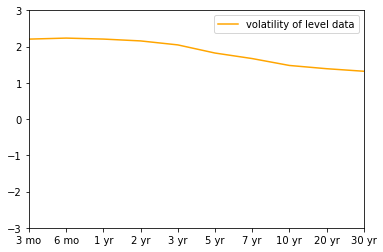

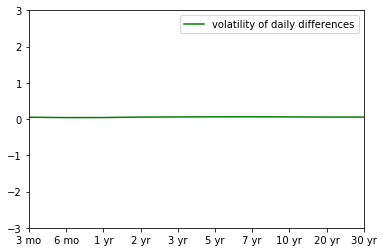

In [9]:
#plot the vol curve of level data & difference data
cut_vol.plot(ylim=(-3.0,3),color='orange',legend=True,label='volatility of level data')
plt.show()

differ_vol.plot(ylim=(-3.0,3),color='g',legend=True,label='volatility of daily differences')
plt.show()

We can clearly see that the volatility of level data is monotonically decreasing, which is compliant with our prediction about the future risk. Basically we think that the near future is more volatile than the far future because far future volatility is more unpredictable. 

On the other side, we see the volatility of daily differences stays quite stable on every vertex, which indicates that the treasury yield rate are stable on every vertex during the period 1/1/1996 - 11/20/2016. e.g. The treasury yield rate for '3 month' is always around 5%. 